In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)
        
url = 'https://raw.githubusercontent.com/neha0812/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'

df = pd.read_csv(url, error_bad_lines=False)

In [39]:
df['pct_change'].quantile(0.01)
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df=df[['ADDRESS', 'ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME', 'LATITUDE',
       'LONGITUDE', 'ROLL_NUMBER', 'Year', 'fsa', 'pct_change',
       'YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4', 'saf5', 'saf6',
       'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2', 'pop3', 'pop4',
       'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3', 'inc4', 'own1',
       'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3', 'vacancy_rate',
       'walk_score_comm', 'transit_score_comm', 'bike_score_comm',
       'comm_polulation', 'pct_change_bin']]
df.reset_index()

,index,ADDRESS,ASSESSED_VALUE,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,ROLL_NUMBER,Year,fsa,...,own4,lab1,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm,comm_polulation,pct_change_bin
0,4550,5507 strathcona hl sw,567000.0,str,strathcona park,51.050910,-114.168405,63199202,2019,t3h,...,0.893168,70.7,10.3,0.263215,0.000000,32.0,49.0,42.0,"7,006","(-1.001, -0.0591]"
1,13492,301 655 meredith rd ne,236500.0,brd,bridgeland/riverside,51.051640,-114.048608,200551950,2017,t2e,...,0.503484,75.2,9.2,0.231099,6.636461,67.0,66.0,71.0,"5,501","(-1.001, -0.0591]"
2,13493,301 655 meredith rd ne,222000.0,brd,bridgeland/riverside,51.051640,-114.048608,200551950,2018,t2e,...,0.503484,75.2,9.2,0.231099,6.636461,67.0,66.0,71.0,"5,501","(-1.001, -0.0591]"
3,13495,301 655 meredith rd ne,198500.0,brd,bridgeland/riverside,51.051640,-114.048608,200551950,2020,t2e,...,0.503484,75.2,9.2,0.231099,6.636461,67.0,66.0,71.0,"5,501","(-1.001, -0.0591]"
4,2840,3212 1 st nw,441500.0,tux,tuxedo park,51.081083,-114.064734,46190351,2017,t2k,...,0.599592,70.3,10.3,0.278661,0.000000,65.0,59.0,71.0,"4,704","(-1.001, -0.0591]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,4789,1724 17 av sw,504000.0,sca,scarboro,51.038087,-114.101582,66132309,2018,t3c,...,0.466155,76.7,9.0,0.210317,1.801802,63.0,66.0,57.0,"1,005","(0.0201, 2.536]"
15062,4773,1634 12 av sw,482000.0,sna,sunalta,51.042697,-114.098761,66101601,2018,t3c,...,0.466155,76.7,9.0,0.210317,0.000000,82.0,69.0,92.0,"3,121","(0.0201, 2.536]"
15063,4783,1701 12 av sw,426500.0,sna,sunalta,51.042250,-114.099537,66120403,2020,t3c,...,0.466155,76.7,9.0,0.210317,0.000000,82.0,69.0,92.0,"3,121","(0.0201, 2.536]"
15064,12449,226 550 prominence ri sw,176000.0,pat,patterson,51.059011,-114.176946,200295467,2018,t3h,...,0.893168,70.7,10.3,0.263215,4.021847,30.0,41.0,43.0,"4,168","(0.0201, 2.536]"


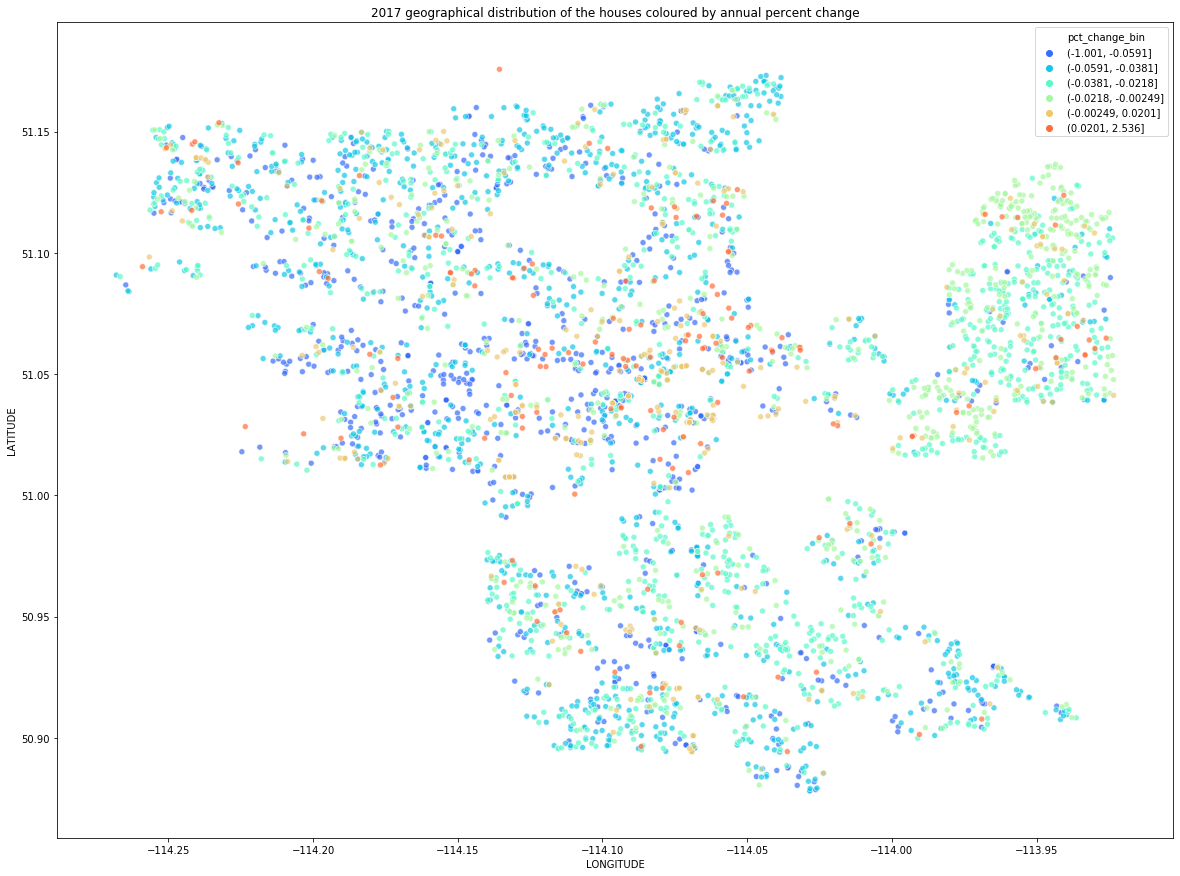

In [40]:
df['pct_change_bin'] = pd.qcut(df['pct_change'], q=6)

df=df.sort_values('pct_change_bin')

sns.set_palette("rainbow")

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2017 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2017], hue = 'pct_change_bin', ax=ax ,alpha=0.7)

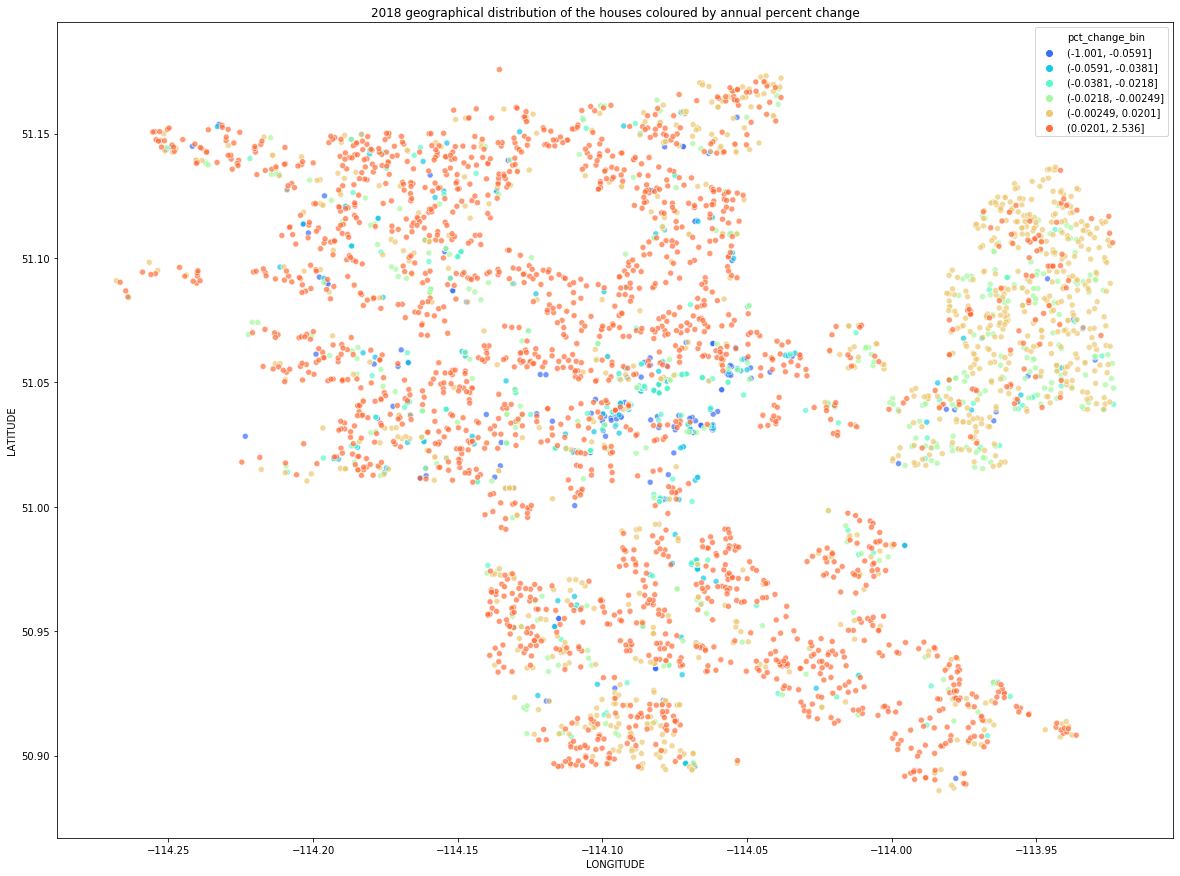

In [41]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2018 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2018], hue = 'pct_change_bin', ax=ax, alpha=0.7)

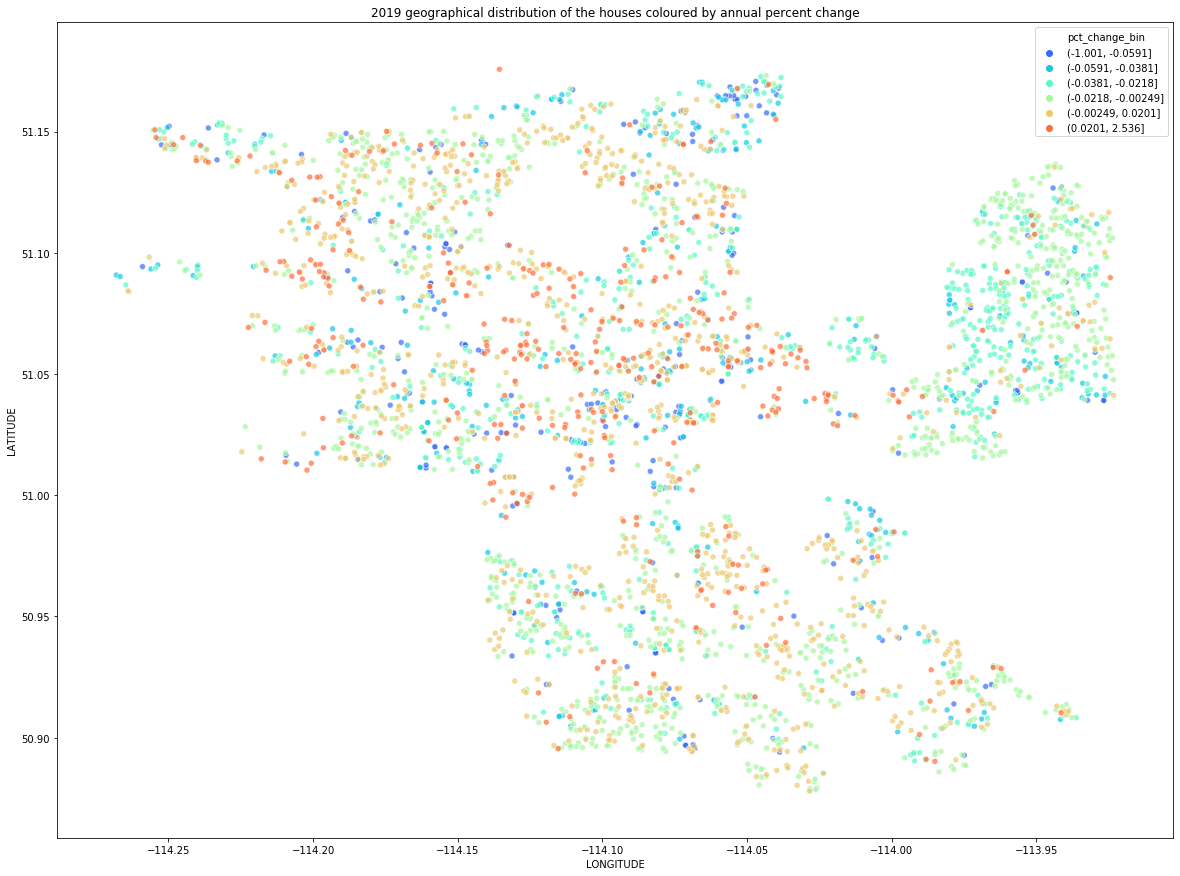

In [42]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2019 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2019], hue = 'pct_change_bin', ax=ax, alpha=0.7)

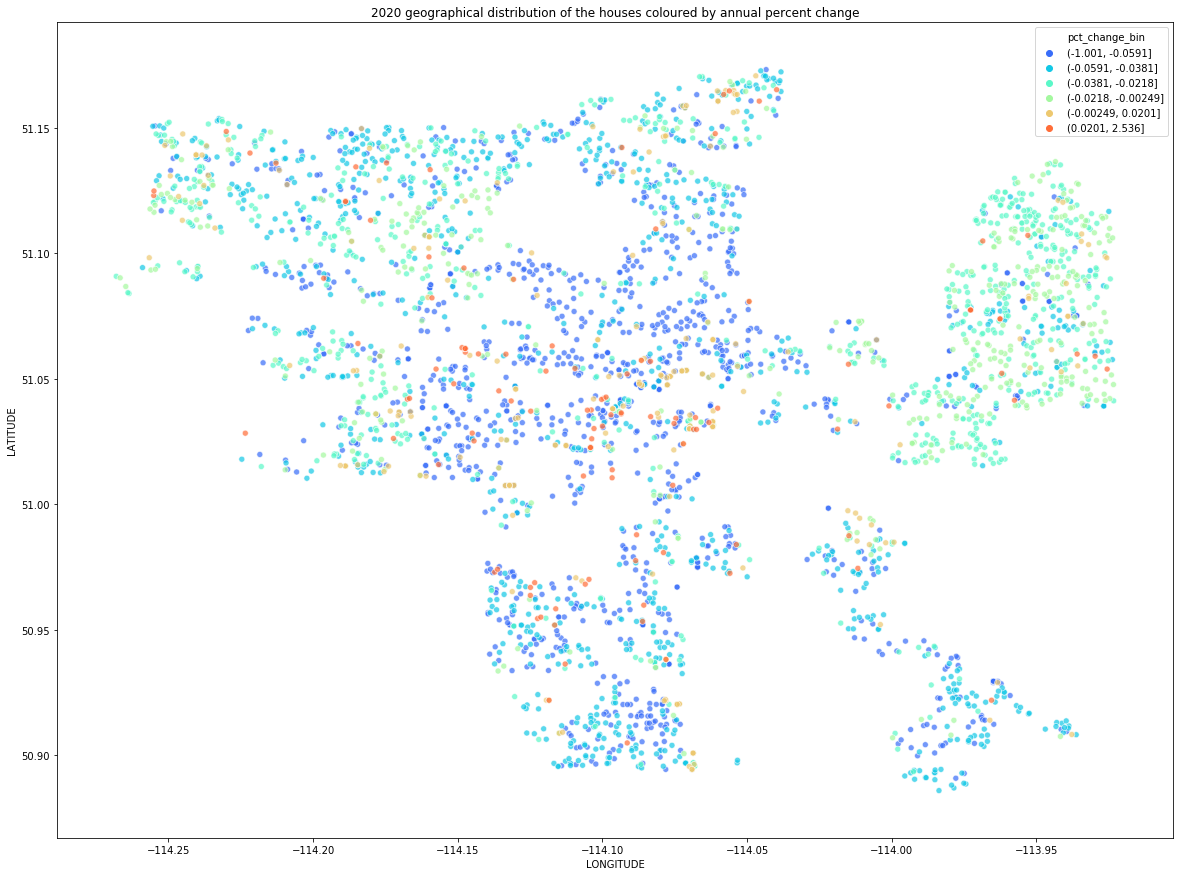

In [43]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2020 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

Text(0.5, 0, 'Year')

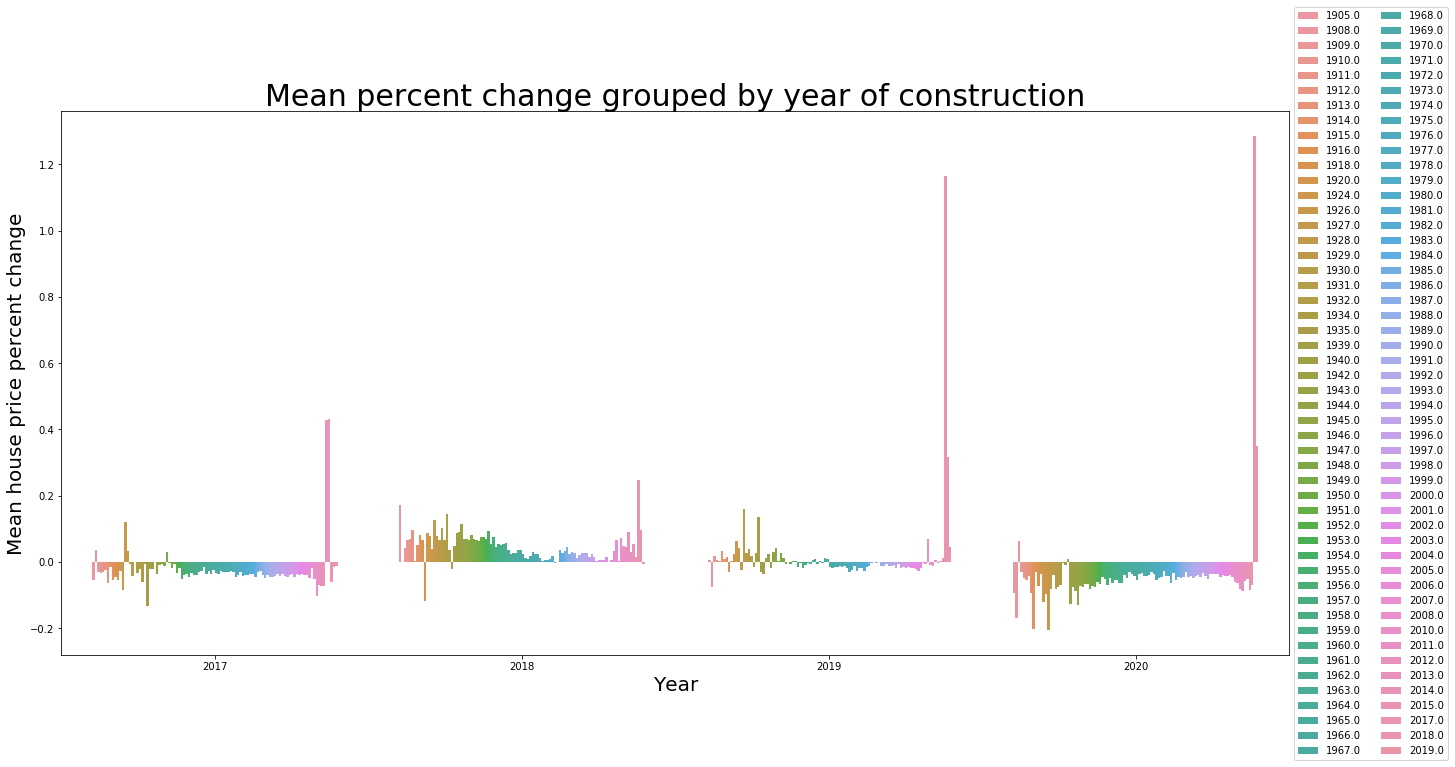

In [44]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('Mean percent change grouped by year of construction', fontsize = 30)
sns.barplot(data = df, x = 'Year', y = 'pct_change', hue = 'YEAR_OF_CONSTRUCTION', estimator = np.mean, ci=None).legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)
ax.set_ylabel('Mean house price percent change', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)